In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [226]:
df = pd.read_csv("/Users/andreaslebec/Mon_Mac/Documents/esilv/A4/semestre_1/python_science/Projet/ObesityDataSet_raw_and_data_sinthetic.csv")


In [227]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [228]:
df.rename(columns = {"family_history_with_overweight": "genetic",
                          "FAVC": "high_calorific",
                          "FCVC": "vegetable",
                          "NCP": "frequence_meal",
                          "CAEC": "between_meal",
                          "SMOKE": "smoke",
                          "CH2O": "water",
                          "SCC": "calories_monitoring",
                          "FAF": "physical_activity",
                          "TUE": "technology_time",
                          "CALC": "alcohol",
                          "MTRANS": "transportation",
                          "NObeyesdad": "obesity"
                         },inplace = True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               2111 non-null   object 
 1   Age                  2111 non-null   float64
 2   Height               2111 non-null   float64
 3   Weight               2111 non-null   float64
 4   genetic              2111 non-null   object 
 5   high_calorific       2111 non-null   object 
 6   vegetable            2111 non-null   float64
 7   frequence_meal       2111 non-null   float64
 8   between_meal         2111 non-null   object 
 9   smoke                2111 non-null   object 
 10  water                2111 non-null   float64
 11  calories_monitoring  2111 non-null   object 
 12  physical_activity    2111 non-null   float64
 13  technology_time      2111 non-null   float64
 14  alcohol              2111 non-null   object 
 15  transportation       2111 non-null   o

[]

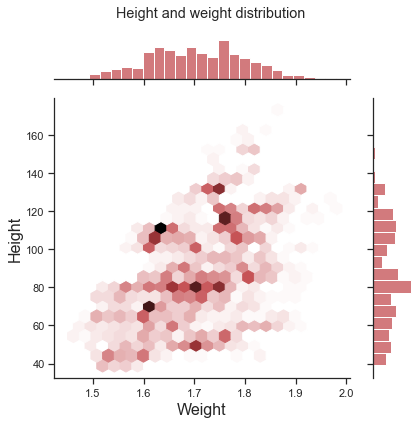

In [230]:
sns.set_theme(style="ticks")

h = sns.jointplot(x=df["Height"], y=df["Weight"], kind="hex", color="r")
h.set_axis_labels(fontsize=16)
h.ax_joint.set_xlabel("Weight")
h.fig.suptitle("Height and weight distribution")
h.ax_joint.set_ylabel("Height")
h.figure.tight_layout() 
plt.plot()


In [231]:
df_ages = copy.deepcopy(df)
df_ages = df_ages.loc[:,["Age","obesity"]] # We keep the columns that we want to study together
# Creation of a new column named "age interval" that regroup ages every 4 years
df_ages["age interval"] = pd.cut(x=df_ages["Age"], bins=[i*4 for i in range(0,30)]) 
# In the column "age interval", we change the type to a string and we delete the "(" and the "]"
df_ages["age interval"] = df_ages["age interval"].astype(str).str[1:-1]

In [232]:
df_ages.drop("Age",axis=1,inplace=True) #We have the column "age interval" so we can delete the column "age"

In [233]:
df_ages_dummies = pd.get_dummies(df_ages,columns=['obesity'], prefix='', prefix_sep='')
# To obtain a bargraph stacked we need to create columns with each type of obesity

In [234]:
df_ages_dummies = df_ages_dummies.groupby(["age interval"]).sum() # We regroup every age's interval

In [235]:
df_ages_dummies = df_ages_dummies[["Insufficient_Weight",
                                   "Normal_Weight",
                                   "Overweight_Level_I",
                                   "Overweight_Level_II",
                                   "Obesity_Type_I",
                                   "Obesity_Type_II",
                                   "Obesity_Type_III"]] # We change the order of the columns 

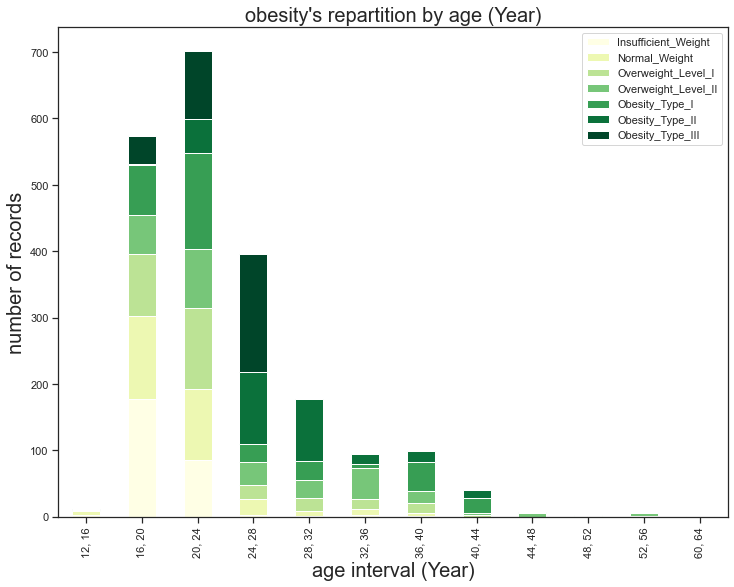

In [236]:
colors = plt.cm.YlGn(np.linspace(0, 1, 7))
ax = df_ages_dummies.plot(kind="bar", stacked=True, color = colors)
ax.set_xlabel("age interval (Year)",fontsize=20)
ax.set_ylabel("number of records",fontsize=20)
ax.set_title("obesity's repartition by age (Year)",fontsize=20)
plt.show()

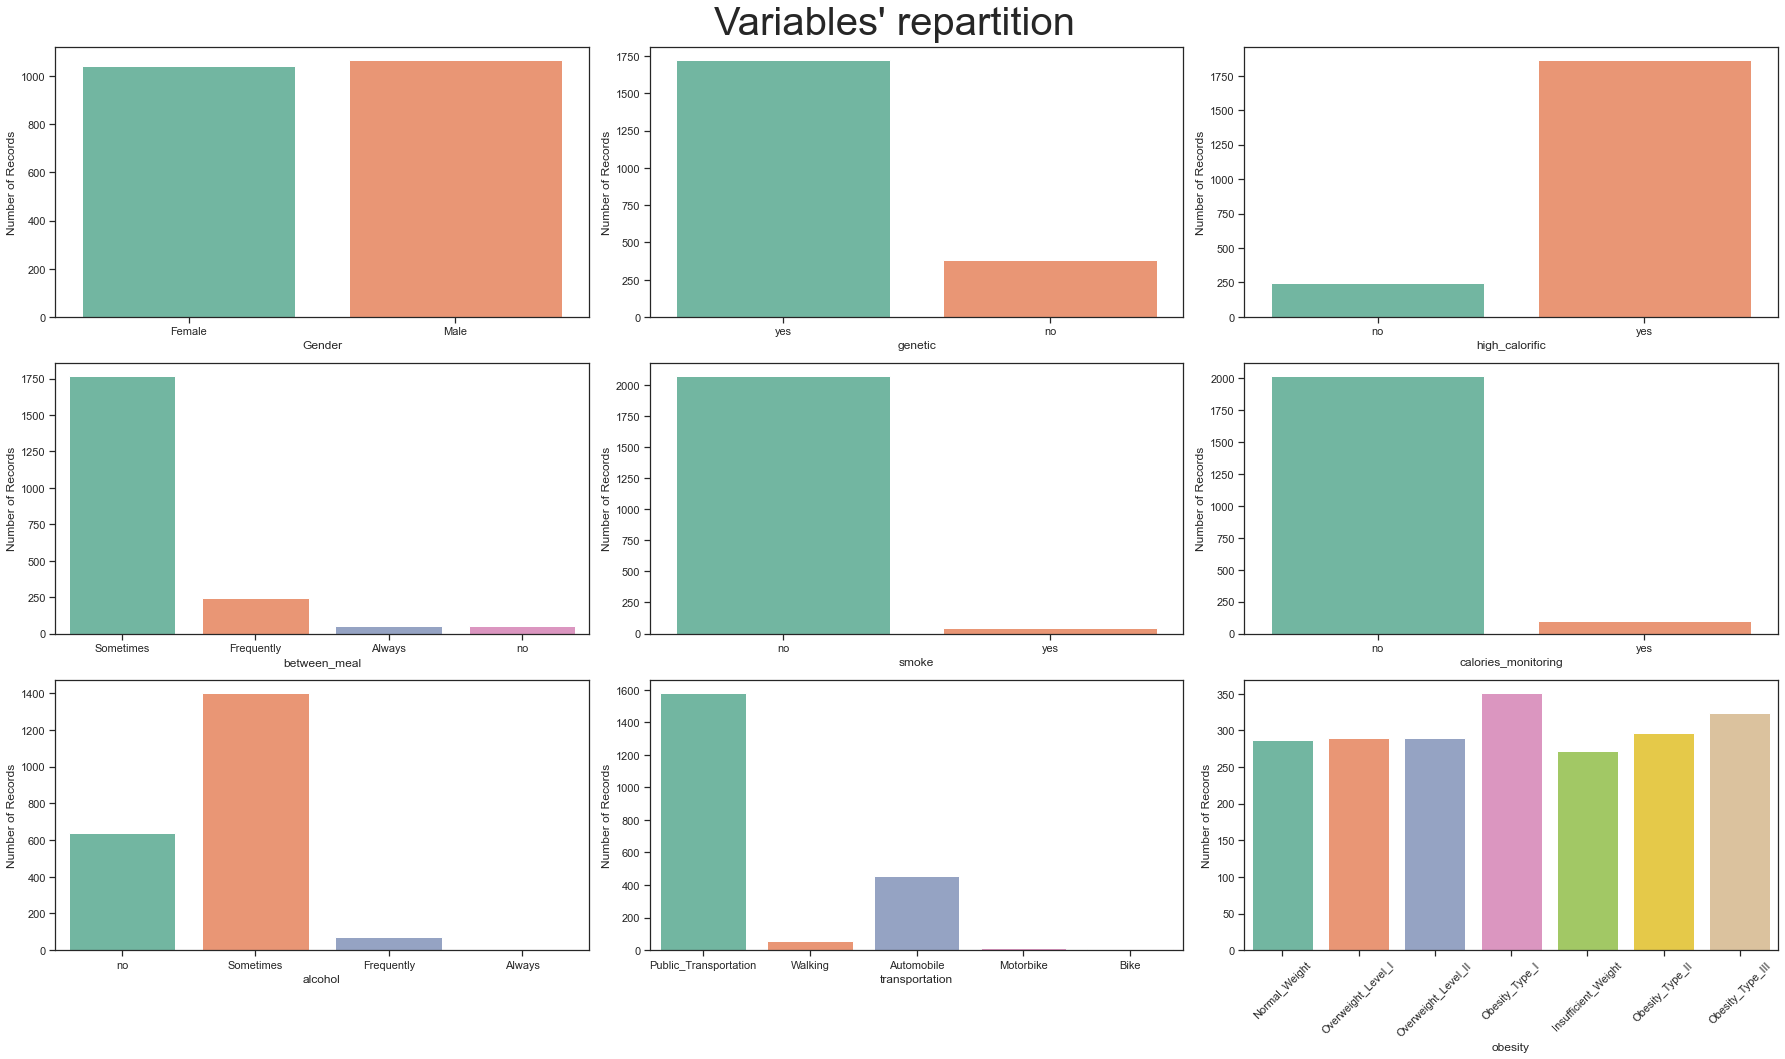

In [237]:
#We show the repartion of variable that a few possible value
columns = ['Gender', 'genetic', 'high_calorific', 'between_meal', "smoke",
           'calories_monitoring', 'alcohol', 'transportation', 'obesity']

fig, ax = plt.subplots(3, 3, figsize=(25, 15))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col],ax=subplot, palette = "Set2")  
    subplot.yaxis.label.set_text("Number of Records")
    plt.xticks(rotation=45) 
        
fig.suptitle("Variables' repartition", fontsize=40)
plt.tight_layout()
plt.show()

In [238]:
df_smoke = copy.deepcopy(df)
df_smoke = df_smoke.loc[:,["smoke","obesity"]] # We keep the columns that we want to study together
# To obtain a bargraph stacked we need to create columns with each type of smoke (yes/no)
df_smoke_dummies = pd.get_dummies(df_smoke,columns=['smoke'], prefix='', prefix_sep='') 
df_smoke_dummies = df_smoke_dummies.groupby(["obesity"]).sum()

In [239]:
df_smoke_dummies = df_smoke_dummies.reindex(index = ["Insufficient_Weight",
                                   "Normal_Weight",
                                   "Overweight_Level_I",
                                   "Overweight_Level_II",
                                   "Obesity_Type_I",
                                   "Obesity_Type_II",
                                   "Obesity_Type_III"]) # We change the order of the columns 

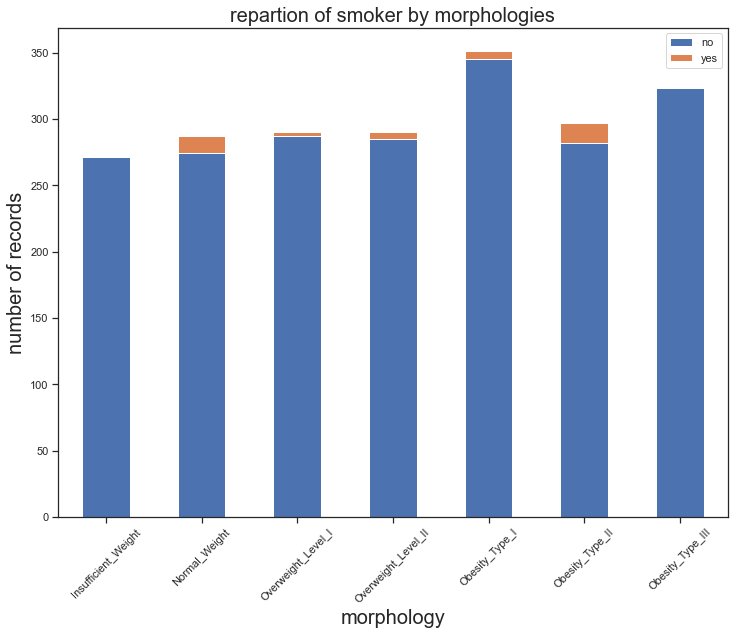

In [240]:
ax = df_smoke_dummies.plot(kind="bar", stacked=True)
ax.set_xlabel("morphology",fontsize=20)
ax.set_ylabel("number of records",fontsize=20)
ax.set_title("repartion of smoker by morphologies",fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [241]:
df_genetic = copy.deepcopy(df)
df_genetic = df_genetic.loc[:,["genetic","obesity"]] # We keep the columns that we want to study together
# To obtain a bargraph stacked we need to create columns with each type of smoke (yes/no)
df_genetic_dummies = pd.get_dummies(df_genetic,columns=['genetic'], prefix='', prefix_sep='') 
df_genetic_dummies = df_genetic_dummies.groupby(["obesity"]).sum()

In [242]:
df_genetic_dummies = df_genetic_dummies.reindex(index = ["Insufficient_Weight",
                                   "Normal_Weight",
                                   "Overweight_Level_I",
                                   "Overweight_Level_II",
                                   "Obesity_Type_I",
                                   "Obesity_Type_II",
                                   "Obesity_Type_III"]) # We change the order of the columns 

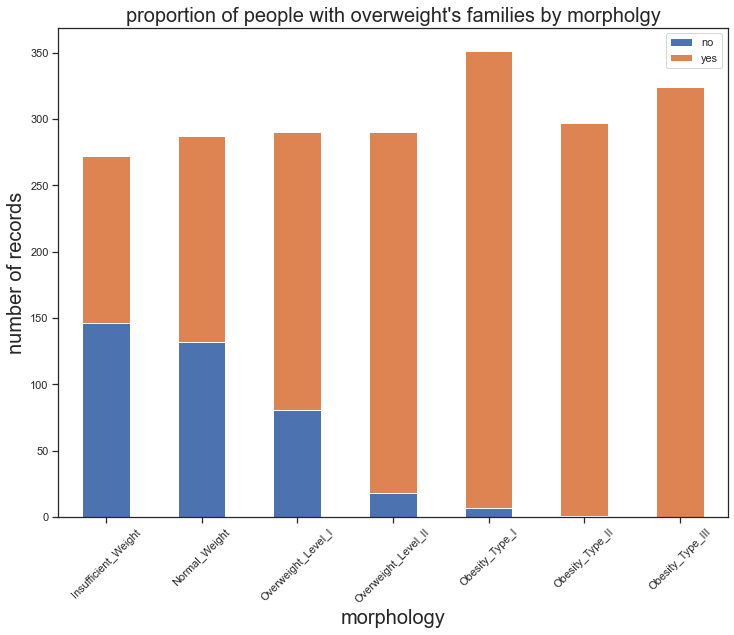

In [243]:
ax = df_genetic_dummies.plot(kind="bar", stacked=True)
ax.set_xlabel("morphology",fontsize=20)
ax.set_ylabel("number of records",fontsize=20)
ax.set_title("proportion of people with overweight's families by morpholgy",fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [244]:
df_high_calorific = copy.deepcopy(df)
df_high_calorific = df_high_calorific.loc[:,["obesity","high_calorific"]] # We keep the columns that we want to study together
# To obtain a bargraph stacked we need to create columns with each type of high calorific (yes/no)
df_high_calorific_dummies = pd.get_dummies(df_high_calorific,columns=['high_calorific'], prefix='', prefix_sep='') 
df_high_calorific_dummies = df_high_calorific_dummies.groupby(["obesity"]).sum()

In [245]:
df_high_calorific_dummies = df_high_calorific_dummies.reindex(index = ["Insufficient_Weight",
                                   "Normal_Weight",
                                   "Overweight_Level_I",
                                   "Overweight_Level_II",
                                   "Obesity_Type_I",
                                   "Obesity_Type_II",
                                   "Obesity_Type_III"]) # We change the order of the columns 

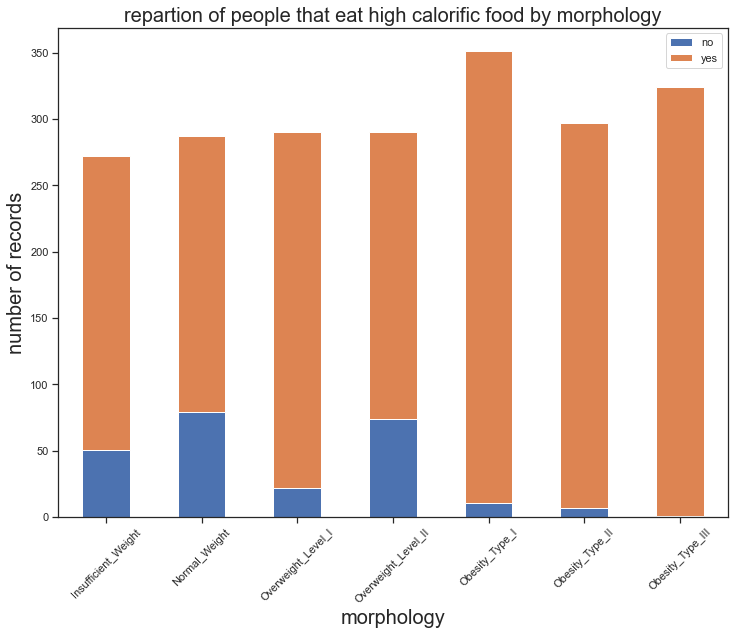

In [246]:
ax = df_high_calorific_dummies.plot(kind="bar", stacked=True)
ax.set_xlabel("morphology",fontsize=20)
ax.set_ylabel("number of records",fontsize=20)
ax.set_title("repartion of people that eat high calorific food by morphology",fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [247]:
df_monitoring = copy.deepcopy(df)
df_monitoring = df_monitoring.loc[:,["obesity","calories_monitoring"]] # We keep the columns that we want to study together
# To obtain a bargraph stacked we need to create columns with each type of calories monitoring (yes/no)
df_monitoring_dummies = pd.get_dummies(df_monitoring,columns=['calories_monitoring'], prefix='', prefix_sep='') 
df_monitoring_dummies = df_monitoring_dummies.groupby(["obesity"]).sum()

In [248]:
df_monitoring_dummies = df_monitoring_dummies.reindex(index = ["Insufficient_Weight",
                                   "Normal_Weight",
                                   "Overweight_Level_I",
                                   "Overweight_Level_II",
                                   "Obesity_Type_I",
                                   "Obesity_Type_II",
                                   "Obesity_Type_III"]) # We change the order of the columns 

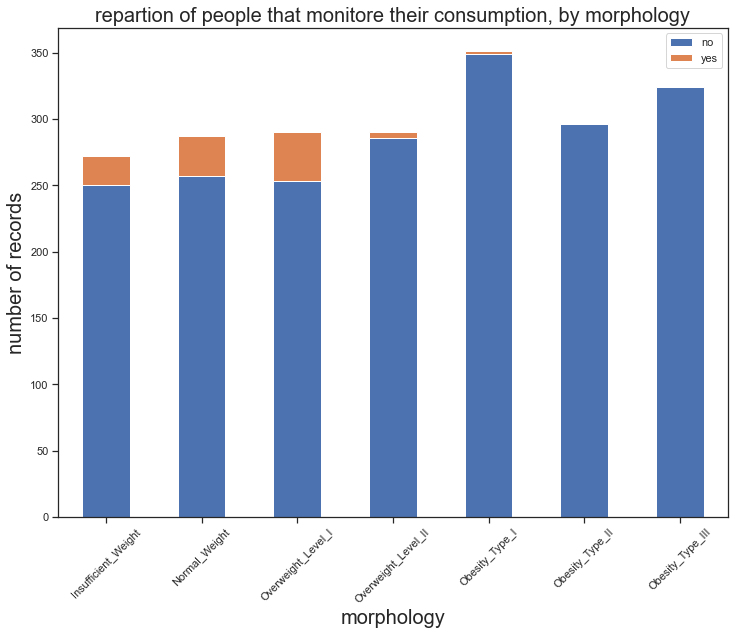

In [249]:
ax = df_monitoring_dummies.plot(kind="bar", stacked=True)
ax.set_xlabel("morphology",fontsize=20)
ax.set_ylabel("number of records",fontsize=20)
ax.set_title("repartion of people that monitore their consumption, by morphology",fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [250]:
df_obesity_4_cat = copy.deepcopy(df)
#We regroup the differents morphologies in 4 categoties
df_obesity_4_cat.replace("Insufficient_Weight","insufficient",inplace = True)
df_obesity_4_cat.replace("Normal_Weight","normal",inplace = True)
df_obesity_4_cat.replace(["Overweight_Level_I","eOverweight_Level_II"],"overweight",inplace = True)
df_obesity_4_cat.replace(["Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"],"obesity",inplace = True)

df_obesity_4_cat_gb = df_obesity_4_cat.groupby("obesity").mean()

In [251]:
df_obesity_4_cat_gb.drop(["Age","Height","Weight"],axis=1,inplace=True)

In [252]:
df_obesity_4_cat_gb

,vegetable,frequence_meal,water,physical_activity,technology_time
obesity,,,,,
Overweight_Level_II,2.260578,2.495529,2.025133,0.958072,0.697275
insufficient,2.480788,2.914403,1.871281,1.250131,0.839459
normal,2.334495,2.738676,1.850174,1.247387,0.675958
obesity,2.520077,2.716786,2.072639,0.874888,0.603338
overweight,2.264631,2.504218,2.058725,1.056796,0.612992


In [253]:
# We create a dataset for each morphology
df_insufficient = df_obesity_4_cat_gb.loc["insufficient",:]
df_normal = df_obesity_4_cat_gb.loc["normal",:]
df_overweight = df_obesity_4_cat_gb.loc["overweight",:]
df_obesity = df_obesity_4_cat_gb.loc["obesity",:]

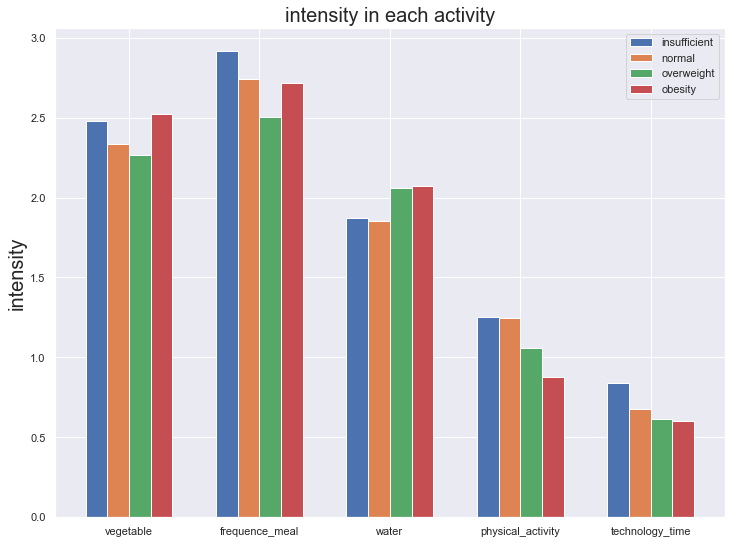

In [254]:
sns.set(rc={'figure.figsize':(12,9)})

comparaison = df_obesity.index.tolist()
index = np.arange(1,15,3)
bar_width = 0.5

fig, ax = plt.subplots()
insufficient = ax.bar(index-1.5*bar_width,df_insufficient, bar_width,
                label="insufficient")

normal = ax.bar(index-0.5*bar_width,df_normal, bar_width,
                label="normal")

overweight = ax.bar(index+0.5*bar_width, df_overweight,
                 bar_width, label="overweight")

obesity = ax.bar(index+1.5*bar_width, df_obesity,
                 bar_width, label="obesity")

ax.set_ylabel('intensity',fontsize=20)
ax.set_title('intensity in each activity',fontsize=20)
ax.set_xticks(index) 
ax.set_xticklabels(comparaison)
ax.legend()

plt.show()

In [255]:
#We change string value into int value
df_IMC = copy.deepcopy(df)
df_IMC['genetic'] = df_IMC['genetic'].map({'yes': 1, 'no': 0})
df_IMC['high_calorific'] = df_IMC['high_calorific'].map({'yes': 1, 'no': 0})
df_IMC['smoke'] = df_IMC['smoke'].map({'yes': 1, 'no': 0})
df_IMC['calories_monitoring'] = df_IMC['calories_monitoring'].map({'yes': 1, 'no': 0})
df_IMC['Gender'] = df_IMC['Gender'].map({'Male': 1, 'Female': 0})
df_IMC['alcohol'] = df_IMC['alcohol'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df_IMC['between_meal'] = df_IMC['between_meal'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df_IMC.drop(["transportation","obesity"], axis = 1, inplace = True)
df_IMC["IMC"] = df_IMC["Weight"]/(df_IMC["Height"]**2)


In [256]:
df_IMC

,Gender,Age,Height,Weight,genetic,high_calorific,vegetable,frequence_meal,between_meal,smoke,water,calories_monitoring,physical_activity,technology_time,alcohol,IMC
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,24.386526
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,24.238227
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,23.765432
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,26.851852
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,44.901475
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,43.741923
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,43.543817
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,44.071535


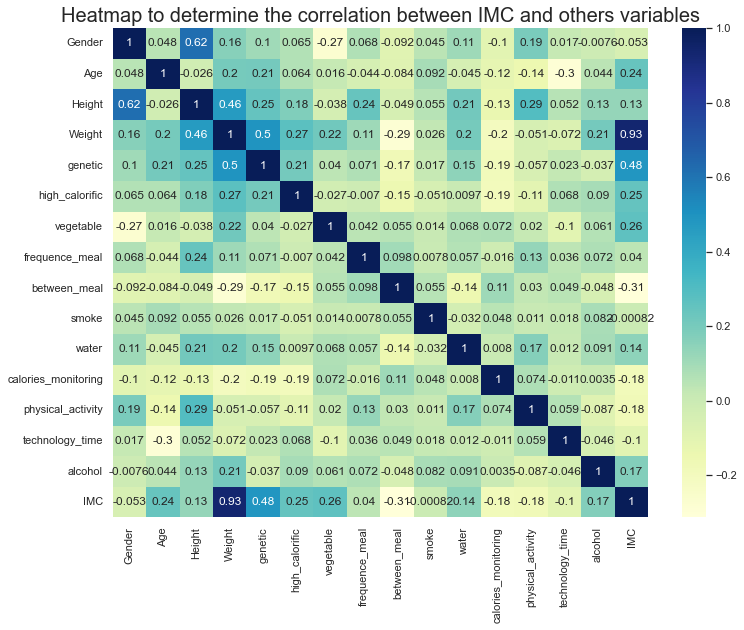

In [257]:
ax = sns.heatmap(df_IMC.corr(),cmap="YlGnBu", annot=True) 
ax.set_title("Heatmap to determine the correlation between IMC and others variables",fontsize=20)
plt.show()

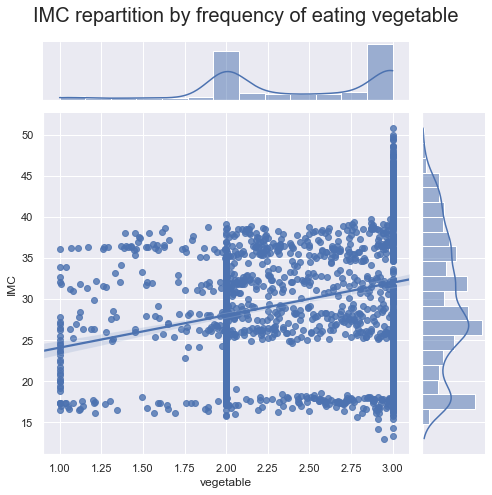

In [258]:
g = sns.jointplot("vegetable", "IMC", data=df_IMC,kind="reg", truncate=False, height=7)
g.fig.suptitle("IMC repartition by frequency of eating vegetable",fontsize=20)
g.fig.tight_layout()